In [2]:
import pandas as pd

In [1]:
try:
    markets = pd.read_parquet("../data/fpmms.parquet")
except Exception:
    print("Error reading the parquet file")

# markets["currentAnswer"] = markets["currentAnswer"].apply(lambda x: x.lower())
# # filter only markets with  yes, no answers
# valid_answers = ["yes", "no"]
# markets = markets.loc[markets["currentAnswer"].isin(valid_answers)]

Error reading the parquet file


In [3]:
try:
    markets_df = pd.read_parquet("../data/fpmmTrades.parquet")
except Exception:
    print("Error reading the parquet file")

In [4]:
markets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117525 entries, 0 to 117524
Data columns (total 26 columns):
 #   Column                         Non-Null Count   Dtype              
---  ------                         --------------   -----              
 0   collateralAmount               117525 non-null  object             
 1   collateralAmountUSD            117525 non-null  object             
 2   collateralToken                117525 non-null  object             
 3   creationTimestamp              117525 non-null  datetime64[ns, UTC]
 4   trader_address                 117525 non-null  object             
 5   feeAmount                      117525 non-null  object             
 6   id                             117525 non-null  object             
 7   oldOutcomeTokenMarginalPrice   117525 non-null  object             
 8   outcomeIndex                   117525 non-null  object             
 9   outcomeTokenMarginalPrice      117525 non-null  object             
 10  outcomeT

In [5]:
def add_creation_date(df):
    df["creation_timestamp"] = pd.to_datetime(df["creationTimestamp"])
    df["creation_date"] = df["creation_timestamp"].dt.date
    df["creation_date"] = pd.to_datetime(df["creation_date"])

In [6]:
markets_df["creation_timestamp"] = pd.to_datetime(markets_df["creationTimestamp"])
markets_df["creation_date"] = markets_df["creation_timestamp"].dt.date
markets_df["creation_date"] = pd.to_datetime(markets_df["creation_date"])

In [7]:
max(markets_df.creation_date)

Timestamp('2024-12-28 00:00:00')

In [14]:
markets_df.creation_date.value_counts()

creation_date
2025-01-11    5275
2024-12-12    5156
2025-01-12    3919
2024-12-21    3849
2024-12-10    3799
2024-12-11    3739
2025-01-10    3711
2024-12-24    3676
2024-12-19    3486
2024-12-20    3189
2024-11-23    3124
2024-11-30    3078
2024-11-18    3069
2024-12-09    3068
2024-12-26    3066
2024-12-23    2921
2024-11-27    2905
2024-11-28    2841
2024-11-22    2840
2024-12-02    2826
2024-12-22    2663
2024-11-24    2626
2024-12-08    2621
2024-12-04    2612
2024-11-26    2549
2024-11-25    2542
2024-11-29    2541
2024-12-01    2521
2025-01-09    2517
2024-11-20    2503
2024-11-16    2502
2024-11-14    2348
2024-11-21    2315
2024-12-07    2242
2025-01-08    2231
2024-11-15    2207
2024-12-06    2203
2024-11-19    2183
2024-12-16    2168
2024-12-14    2144
2024-12-18    2088
2024-12-13    2079
2024-12-05    2060
2024-12-27    1900
Name: count, dtype: int64

<Axes: xlabel='Count', ylabel='creation_date'>

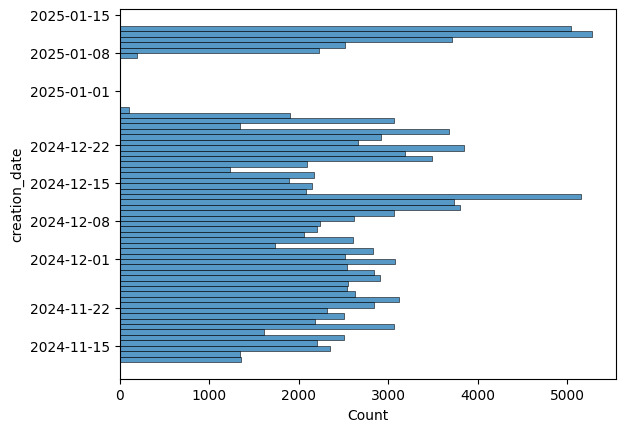

In [18]:
import seaborn as sns

sns.histplot(markets_df, y="creation_date")

In [25]:
from datetime import datetime
cutoff_date1 = "2024-12-28"
cutoff_date2 = "2025-01-08"
timestamp1 = pd.Timestamp(
datetime.strptime(cutoff_date1, "%Y-%m-%d")
).tz_localize("UTC")
timestamp2 = pd.Timestamp(
datetime.strptime(cutoff_date2, "%Y-%m-%d")
).tz_localize("UTC")

In [26]:
missing_data = markets_df.loc[(markets_df["creation_timestamp"]>=timestamp1) & (markets_df["creation_timestamp"]<=timestamp2)]

In [27]:
missing_data.creation_date.value_counts()

creation_date
2025-01-07    194
2024-12-28    106
Name: count, dtype: int64

<Axes: xlabel='Count', ylabel='creation_date'>

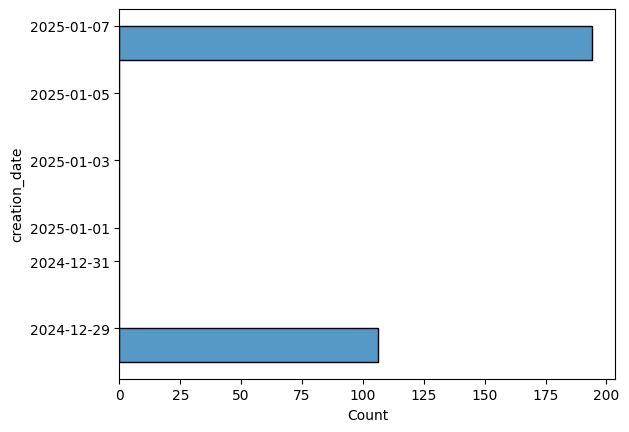

In [28]:
sns.histplot(missing_data, y="creation_date")

In [24]:
markets_df.loc[markets_df["creation_timestamp"]>timestamp2].creation_date.value_counts()

creation_date
2025-01-11    5275
2025-01-12    3919
2025-01-10    3711
2025-01-09    2517
2025-01-08    2231
2025-01-13    1124
2025-01-07     194
Name: count, dtype: int64

In [ ]:
filtered_traders["month_year_week"] =(
        pd.to_datetime(filtered_traders["creation_timestamp"]).dt.to_period("W").dt.strftime("%b-%d-%Y")
)

In [6]:
markets_df.columns

Index(['collateralAmount', 'collateralAmountUSD', 'collateralToken',
       'creationTimestamp', 'trader_address', 'feeAmount', 'id',
       'oldOutcomeTokenMarginalPrice', 'outcomeIndex',
       'outcomeTokenMarginalPrice', 'outcomeTokensTraded', 'title',
       'transactionHash', 'type', 'market_creator',
       'fpmm.answerFinalizedTimestamp', 'fpmm.arbitrationOccurred',
       'fpmm.currentAnswer', 'fpmm.id', 'fpmm.isPendingArbitration',
       'fpmm.openingTimestamp', 'fpmm.outcomes', 'fpmm.title',
       'fpmm.condition.id'],
      dtype='object')

In [ ]:
len(markets.id.unique())

In [5]:
markets.head()

currentAnswer                                          id  \
0            no  0x0017cd58d6a7ee1451388c7d5b1051b4c0a041f5   
1            no  0x0020d13c89140b47e10db54cbd53852b90bc1391   
2            no  0x003ae5e007cc38b3f86b0ed7c82f938a1285ac07   
3           yes  0x004c8d4c619dc6b9caa940f5ea7ef699ae85359c   
4           yes  0x005e3f7a90585acbec807425a750fbba1d0c2b5c   

                                               title market_creator  
0  Will the first floating offshore wind research...     quickstart  
1  Will the Francis Scott Key Bridge in Baltimore...     quickstart  
2  Will FC Saarbrucken reach the final of the Ger...     quickstart  
3  Will the pro-life activists convicted for 'con...     quickstart  
4  Will Apple announce the release of a new M4 ch...     quickstart

In [8]:
trades = pd.read_parquet("../data/fpmmTrades.parquet")

In [9]:
trades.head()

collateralAmount                   collateralAmountUSD  \
0   930596765045617408  0.9305977993411753386434828033666473   
1  1033247234796193800   1.033250126003339493791032993674525   
2  1206692368842898300   1.206691596248187968367063717078884   
3   930598203274544384  0.9305992375717008091217928729793422   
4  1798695965102918400   1.798696795931342313936125782275225   

                              collateralToken creationTimestamp  \
0  0xe91d153e0b41518a2ce8dd3d7944fa863463a97d        1728596605   
1  0xe91d153e0b41518a2ce8dd3d7944fa863463a97d        1728505575   
2  0xe91d153e0b41518a2ce8dd3d7944fa863463a97d        1728562895   
3  0xe91d153e0b41518a2ce8dd3d7944fa863463a97d        1728596645   
4  0xe91d153e0b41518a2ce8dd3d7944fa863463a97d        1728337780   

                               trader_address          feeAmount  \
0  0x01274796ce41aa8e8312e05a427ffb4b0d2148f6   9305967650456174   
1  0x034c4ad84f7ac6638bf19300d5bbe7d9b981e736  10332472347961938   
2  0x05e8bbdb89c84a14d05194bbbae81caf2340db72  12066923688428983   
3  0x17c17ca981b7e244d0bad80b632a082dc1db36e5   9305982032745443   
4  0x1d942103400c1f1657dcbffd5e08904787ea936b  17986959651029184   

                                                  id  \
0  0x007068173910cf8719b6f2e66a18b6825c9dde820x01...   
1  0x007068173910cf8719b6f2e66a18b6825c9dde820x03...   
2  0x007068173910cf8719b6f2e66a18b6825c9dde820x05...   
3  0x007068173910cf8719b6f2e66a18b6825c9dde820x17...   
4  0x007068173910cf8719b6f2e66a18b6825c9dde820x1d...   

           oldOutcomeTokenMarginalPrice outcomeIndex  \
0  0.5581119797629801968338361802418564            0   
1  0.6602089902983034451244461308090707            0   
2  0.1931459183043721864309864210684546            1   
3   0.611825749650855211231211687533889            0   
4  0.7636157369419787681755577286755703            0   

              outcomeTokenMarginalPrice  ... market_creator  \
0   0.611825749650855211231211687533889  ...     quickstart   
1  0.7034159692833852946883644485233207  ...     quickstart   
2  0.3033804066591317111055858533563476  ...     quickstart   
3  0.6579972404391247884756597316198778  ...     quickstart   
4  0.8080447772492735383356100969932859  ...     quickstart   

  fpmm.answerFinalizedTimestamp fpmm.arbitrationOccurred  \
0                    1728822710                    False   
1                    1728822710                    False   
2                    1728822710                    False   
3                    1728822710                    False   
4                    1728822710                    False   

                                  fpmm.currentAnswer  \
0  0x00000000000000000000000000000000000000000000...   
1  0x00000000000000000000000000000000000000000000...   
2  0x00000000000000000000000000000000000000000000...   
3  0x00000000000000000000000000000000000000000000...   
4  0x00000000000000000000000000000000000000000000...   

                                      fpmm.id fpmm.isPendingArbitration  \
0  0x007068173910cf8719b6f2e66a18b6825c9dde82                     False   
1  0x007068173910cf8719b6f2e66a18b6825c9dde82                     False   
2  0x007068173910cf8719b6f2e66a18b6825c9dde82                     False   
3  0x007068173910cf8719b6f2e66a18b6825c9dde82                     False   
4  0x007068173910cf8719b6f2e66a18b6825c9dde82                     False   

   fpmm.openingTimestamp fpmm.outcomes  \
0             1728691200     [Yes, No]   
1             1728691200     [Yes, No]   
2             1728691200     [Yes, No]   
3             1728691200     [Yes, No]   
4             1728691200     [Yes, No]   

                                          fpmm.title  \
0  Will the emergency public warning tests planne...   
1  Will the emergency public warning tests planne...   
2  Will the emergency public warning tests planne...   
3  Will the emergency public warning tests planne...   
4  Will the emergency public warning tests planne...   

                 

In [9]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26835 entries, 0 to 26834
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   collateralAmount               26835 non-null  object
 1   collateralAmountUSD            26835 non-null  object
 2   collateralToken                26835 non-null  object
 3   creationTimestamp              26835 non-null  object
 4   trader_address                 26835 non-null  object
 5   feeAmount                      26835 non-null  object
 6   id                             26835 non-null  object
 7   oldOutcomeTokenMarginalPrice   26835 non-null  object
 8   outcomeIndex                   26835 non-null  object
 9   outcomeTokenMarginalPrice      26835 non-null  object
 10  outcomeTokensTraded            26835 non-null  object
 11  title                          26835 non-null  object
 12  transactionHash                26835 non-null  object
 13  t

In [19]:
trades.columns

Index(['collateralAmount', 'collateralAmountUSD', 'collateralToken',
       'creationTimestamp', 'trader_address', 'feeAmount', 'id',
       'oldOutcomeTokenMarginalPrice', 'outcomeIndex',
       'outcomeTokenMarginalPrice', 'outcomeTokensTraded', 'title',
       'transactionHash', 'type', 'market_creator',
       'fpmm.answerFinalizedTimestamp', 'fpmm.arbitrationOccurred',
       'fpmm.currentAnswer', 'fpmm.id', 'fpmm.isPendingArbitration',
       'fpmm.openingTimestamp', 'fpmm.outcomes', 'fpmm.title',
       'fpmm.condition.id'],
      dtype='object')

In [11]:
markets = list(trades["fpmm.id"].unique())

In [12]:
len(markets)

803

In [50]:
from datetime import datetime
INVALID_ANSWER_HEX = (
    "0xffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff"
)
columns_of_interest = [
        "fpmm.currentAnswer",
        "fpmm.id",
        "fpmm.openingTimestamp",
        "market_creator",
    ]
trade_markets = trades[columns_of_interest]
trade_markets.rename(
    columns={
        "fpmm.currentAnswer": "currentAnswer",
        "fpmm.openingTimestamp": "openingTimestamp",
        "fpmm.id": "id",
    },
    inplace=True,
)
trade_markets = trade_markets.drop_duplicates(subset=['id'], keep='last')
# remove invalid answers

trade_markets = trade_markets.loc[trade_markets["currentAnswer"]!= INVALID_ANSWER_HEX]
trade_markets["currentAnswer"] = trade_markets["currentAnswer"].apply(
    lambda x: convert_hex_to_int(x)
)
trade_markets["opening_datetime"] = trade_markets["openingTimestamp"].apply(
    lambda x: datetime.fromtimestamp(int(x))
)
trade_markets = trade_markets.sort_values(by="opening_datetime", ascending=True)

/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_3094/2495807215.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_markets.rename(


In [63]:
len(trade_markets.id.unique())

648

In [64]:
len(trade_markets)

648

In [ ]:
trade_markets.tail()

In [53]:
len(trade_markets)

719

In [54]:
trade_markets.dropna(inplace=True)

In [55]:
len(trade_markets)

648

In [56]:
trade_markets.tail()

currentAnswer                                          id  \
20792            1.0  0xcc9c26a86dd55aa04dcb0066c9b8fca2983f407d   
21130            1.0  0xd1bd18d7601d106639f922f1b5d2eda025c26be7   
7494             0.0  0x4eba0ec2464ec7c746e8872078165c8ad52d346f   
9911             1.0  0x61065f131e2ec851c40765bb0b078a318a36f53e   
26182            0.0  0x7e191324f0efb8aa20b8c702d95e812e55b4179c   

      openingTimestamp market_creator    opening_datetime  
20792       1727136000     quickstart 2024-09-24 02:00:00  
21130       1727136000     quickstart 2024-09-24 02:00:00  
7494        1727136000     quickstart 2024-09-24 02:00:00  
9911        1727136000     quickstart 2024-09-24 02:00:00  
26182       1727136000          pearl 2024-09-24 02:00:00

In [51]:
import math
def market_KL_divergence(market_row: pd.DataFrame) -> float:
    """Function to compute the divergence based on the formula
    Formula in https://en.wikipedia.org/wiki/Kullback%E2%80%93Leibler_divergence"""
    current_answer = market_row.currentAnswer  # "yes", "no"
    target_prob = 1  # = 100%
    if current_answer == "yes":
        candidate_prob = market_row.first_outcome_prob
    else:  # "no"
        candidate_prob = market_row.second_outcome_prob

    # we have only one sample, the final probability based on tokens
    kl_divergence = candidate_prob * round(math.log(candidate_prob / target_prob), 4)
    return kl_divergence

In [37]:
len(list(trade_markets.id.unique()))

719

In [ ]:
trade_markets.currentAnswer.value_counts()

In [15]:
INVALID_ANSWER_HEX = (
    "0xffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffffff"
)

In [3]:
import numpy as np
def convert_hex_to_int(x):
    """Convert hex to int"""
    if isinstance(x, float):
        return np.nan
    if isinstance(x, str):
        if x == INVALID_ANSWER_HEX:
            return -1
        answer = int(x, 16)
        return answer
        

In [ ]:
market_ids = list(markets.id.unique())
for i in range(len(trade_markets)):
    market = trade_markets.iloc[i]
    if market.id in market_ids:
        current_answer = convert_hex_to_int(market.currentAnswer)
        market_answer = markets.loc[markets["id"]==market.id].currentAnswer.values[0]
        print(f"current answer = {current_answer} and market answer {market_answer}")
        trade_markets.at[i, "currentAnswer"] = market_answer

In [17]:
markets["currentAnswer"] = markets["currentAnswer"].apply(lambda x: convert_hex_to_int(x))

In [18]:
markets.currentAnswer.value_counts()

currentAnswer
 1.0    407
 0.0    241
-1.0     84
Name: count, dtype: int64

In [70]:
import math

candidate_prob = 9/25
target_prob = 1/3
math.log(candidate_prob/target_prob)

0.0769610411361284

In [72]:
import numpy as np

def kl_divergence(p, q):
    """
    Compute KL divergence for a single sample with two probabilities.
    
    :param p: First probability (true distribution)
    :param q: Second probability (approximating distribution)
    :return: KL divergence value
    """
    # Ensure probabilities sum to 1
    p = np.array([p, 1-p])
    q = np.array([q, 1-q])
    
    # Avoid division by zero
    epsilon = 1e-10
    q = np.clip(q, epsilon, 1-epsilon)
    
    # Compute KL divergence
    kl_div = np.sum(p * np.log(p / q))
    
    return kl_div

# Example usage
p = 0.7  # probability from true distribution
q = 1.0  # probability from approximating distribution

result = kl_divergence(p, q)
print(f"KL divergence: {result}")

KL divergence: 6.296890976997244


In [74]:
from scipy.special import kl_div

# For multiple probabilities
p = np.array([0.3, 0.7])
q = np.array([0.0, 1.0])

kl = np.sum(kl_div(p, q))
print(f"KL divergence: {kl}")

KL divergence: inf


This library is not useful if we have extreme values

In [10]:
markets_div = pd.read_parquet("../data/closed_markets_div.parquet")
markets_div.head()

Empty DataFrame
Columns: [currentAnswer, id, openingTimestamp, market_creator, opening_datetime, first_outcome_prob, second_outcome_prob, kl_divergence, off_by_perc]
Index: []

In [76]:
markets_div.tail()

currentAnswer                                          id  \
642           yes  0x4eba0ec2464ec7c746e8872078165c8ad52d346f   
643            no  0x3535b4cea3ea7b1862fbe1af5a458702cc1c0dad   
644           yes  0x7e191324f0efb8aa20b8c702d95e812e55b4179c   
645            no  0xd1bd18d7601d106639f922f1b5d2eda025c26be7   
646            no  0x61065f131e2ec851c40765bb0b078a318a36f53e   

    openingTimestamp market_creator    opening_datetime  first_outcome_prob  \
642       1727136000     quickstart 2024-09-24 02:00:00              0.5392   
643       1727136000     quickstart 2024-09-24 02:00:00              0.2812   
644       1727136000          pearl 2024-09-24 02:00:00              0.5000   
645       1727136000     quickstart 2024-09-24 02:00:00              0.5000   
646       1727136000     quickstart 2024-09-24 02:00:00              0.5000   

     second_outcome_prob  kl_divergence  
642               0.4608       9.920241  
643               0.7188       5.880786  
644               0.5000      10.819778  
645               0.5000      10.819778  
646               0.5000      10.819778

In [77]:
len(markets_div)

647

In [1]:
import numpy as np
import math

In [31]:
def kl_divergence(p, q):
    """
    Compute KL divergence for a single sample with two probabilities.

    :param p: First probability (true distribution)
    :param q: Second probability (approximating distribution)
    :return: KL divergence value
    """
    # Ensure probabilities sum to 1
    p = np.array([p, 1 - p])
    q = np.array([q, 1 - q])

    # Avoid division by zero
    epsilon = 1e-10
    q = np.clip(q, epsilon, 1 - epsilon)
    print(q)

    # Compute KL divergence
    kl_div = np.sum(p * np.log(p / q))

    return kl_div

In [17]:
p= 0
q = 0.8145
p = np.array([p, 1 - p])
q = np.array([q, 1 - q])
epsilon = 1e-10
p = np.clip(p, epsilon, 1 - epsilon)
np.log(p/q)

array([-22.82067008,   1.6847004 ])

In [18]:
p*np.log(p/q)

array([-2.28206701e-09,  1.68470040e+00])

In [19]:
np.sum(p * np.log(p / q))

1.6847003943841101

In [3]:
p = 0.8145
q = 1.0
kl_divergence(p,q)

3.791663620863367

In [12]:
p = 0.99
q = 0.8145
kl_divergence(p, q)

0.16397451204513597

In [5]:
from scipy.special import kl_div

# For multiple probabilities
p = np.array([0.99, 0.01])
q = np.array([0.8145, 0.1855])

kl = np.sum(kl_div(p, q))
print(f"KL divergence: {kl}")

KL divergence: 0.16397451204513597


In [13]:
p= 1
q = 0.8145
kl_divergence(p, q)

0.2051808486854041

In [14]:
# For multiple probabilities
p = np.array([1.0, 0.0])
q = np.array([0.8145, 0.1855])

kl = np.sum(kl_div(p, q))
print(f"KL divergence: {kl}")

KL divergence: 0.20518085094003724


In [32]:
p = 0
q = 1
kl_divergence(p, q)

[1.e+00 1.e-10]


/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_28964/3714966623.py:19: RuntimeWarning: divide by zero encountered in log
  kl_div = np.sum(p * np.log(p / q))
/var/folders/gp/02mb1d514ng739czlxw1lhh00000gn/T/ipykernel_28964/3714966623.py:19: RuntimeWarning: invalid value encountered in multiply
  kl_div = np.sum(p * np.log(p / q))


nan

In [28]:
p = np.array([0.0, 1.0])
q = np.array([0.01, 0.99])

kl = np.sum(kl_div(p, q))
print(f"KL divergence: {kl}")

KL divergence: 0.010050335853501449


In [23]:
p = 0.01
q = 0
kl_divergence(p, q)

0.17425697504355725

In [24]:
p = np.array([0.01, 0.99])
q = np.array([0.0, 1.0])

kl = np.sum(kl_div(p, q))
print(f"KL divergence: {kl}")

KL divergence: inf


In [25]:
epsilon = 1e-10
q = 0
q = np.clip(p, epsilon, 1 - epsilon)
q

array([0.01, 0.99])

# New function

In [4]:
def kl_divergence(P, Q):
    """
    Compute KL divergence for a single sample with two prob distributions.

    :param P: True distribution)
    :param Q: Approximating distribution)
    :return: KL divergence value
    """
    # Review edge cases
    if P[0] == Q[0]:
        return 0.0
    # If P is complete opposite of Q, divergence is some max value.
    # Here set to 20--allows for Q [\mu, 1-\mu] or Q[1-\mu, \mu] where \mu = 10^-8
    if P[0] == Q[1]:
        return 20

    nonzero = P > 0.0
    # Compute KL divergence
    kl_div = np.sum(P[nonzero] * np.log(P[nonzero] / Q[nonzero]))

    return kl_div

In [45]:
P = np.array([0.0, 1.0])
Q = np.array([0.0, 1.0])
print(kl_divergence(P,Q))

0.0


In [46]:
P = np.array([0.0, 1.0])
Q = np.array([1.0, 0.0])
print(kl_divergence(P,Q))

20


In [37]:
P = np.array([1.0, 0.0])
Q = np.array([0.0, 1.0])
print(kl_divergence(P,Q))

20


In [49]:
P = np.array([0.0, 1.0])
Q = np.array([0.01, 0.99])
print(kl_divergence(P,Q))

0.010050335853501506


In [43]:
1 * np.log(1 / 0.99)

0.010050335853501506

In [16]:
P = np.array([1.0, 0.0])
Q = np.array([0.60, 0.05])
print(kl_divergence(P,Q))

0.5108256237659907


In [7]:
Q = np.array([1e-6, 0.999999])#or [0.99, 0.01]
P = np.array([1.0, 0.0])
print(kl_divergence(P,Q))

13.815510557964274


In [44]:
np.log(1/0.01)

4.605170185988092

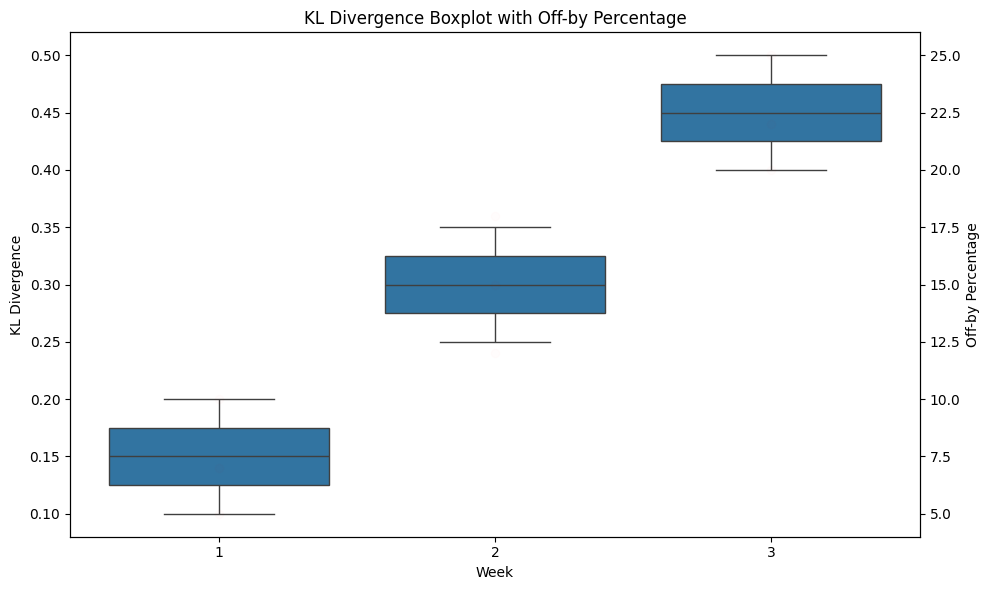

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have your dataframe as 'df'
# If not, you can create a sample dataframe like this:
df = pd.DataFrame({
    'week': [1, 1, 1, 2, 2, 2, 3, 3, 3],
    'kl_divergence': [0.1, 0.2, 0.15, 0.3, 0.25, 0.35, 0.4, 0.45, 0.5],
    'off_by_perc': [5, 10, 7, 15, 12, 18, 20, 22, 25]
})

# Create the main figure and axis
fig, ax1 = plt.subplots(figsize=(10, 6))

# Create the boxplot using seaborn
sns.boxplot(x='week', y='kl_divergence', data=df, ax=ax1)

# Set labels and title for the main axis
ax1.set_xlabel('Week')
ax1.set_ylabel('KL Divergence')
ax1.set_title('KL Divergence Boxplot with Off-by Percentage')

# Create a secondary y-axis
ax2 = ax1.twinx()

# Plot the off_by_perc values on the secondary y-axis
for i, week in enumerate(df['week'].unique()):
    off_by_perc = df[df['week'] == week]['off_by_perc']
    ax2.scatter([i] * len(off_by_perc), off_by_perc, color='red', alpha=0.01)

# Set label for the secondary y-axis
ax2.set_ylabel('Off-by Percentage')

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()